# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [184]:
# 1. IMPORT DAS LIBRARIES
# 2. 


In [239]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [186]:
# LEITURA INICIAL DOS DADOS

auto_industry = pd.read_csv('auto_industry.csv')
print("Data Sample:")
auto_industry.sample(5)

Data Sample:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
52,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat 124b
368,27.0,4,112.0,88.0,2640,18.6,82,usa,chevrolet cavalier wagon
231,15.5,8,400.0,190.0,4325,12.2,77,usa,chrysler cordoba
158,16.0,8,318.0,150.0,4498,14.5,75,usa,plymouth grand fury
250,19.4,8,318.0,140.0,3735,13.2,78,usa,dodge diplomat


In [187]:
# OBSERVAÇÃO INICIAL: COLUMNS DATATYPES
auto_industry.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [188]:
# OBSERVAÇÃO INICIAL: MEDIDAS DE DISPERÇÃO DOS ATRIBUTOS
auto_industry.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [189]:
# OBSERVAÇÃO INICIAL: FORMA DOS DATATYPES. EXISTE ALGUMA VARIÁVEL COM VALORES NULL, NAN OU ""?
print("Records:")
print(auto_industry.shape)

print("\n" + "=>> ISNA:")
print(auto_industry.isna().sum()) 

print("\n" + "=>> ISNULL:")
print(auto_industry.isnull().sum()) 

print("\n" + "=>>" ":")
np.where(auto_industry.applymap(lambda x: x== ' '))


Records:
(398, 9)

=>> ISNA:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>> ISNULL:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>>:


(array([], dtype=int64), array([], dtype=int64))

In [190]:
# DROPPING 6 NULL LINES 
auto_industry.dropna(inplace=True)
print(auto_industry.shape)

(392, 9)


In [191]:
def validate_column_categorical(value):
    if type(value)==str and (re.search('[a-z]+',value) or re.search('[A-Z]+',value)):
        return True
    return False

In [192]:
def validate_column_numeric(value):
    try:
        teste = value/1
        return True
    except:
        return False

In [193]:
# VALIDATING COMPLETION OF CATEGORIC COLUMNS
auto_industry[['origin', 'name']].applymap(validate_column_categorical).value_counts()

origin  name
True    True    392
dtype: int64

In [194]:
# VALIDATING COMPLETION OF NUMERIC COLUMNS
auto_industry[['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']].applymap(validate_column_numeric).value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year
True  True       True          True        True    True          True          392
dtype: int64

## Calcule quantos modelos foram lançados em anos pares

In [229]:
#CONFERIR SE CONTO COM ÚNICO NOME
auto_industry.name[auto_industry.model_year.map(lambda x: x%2== 0)].nunique()

180

## Crie uma coluna para a marca do veículo e outra para o nome

In [237]:
#JA TEM UMA COLUNA PARA O NOME. ADICIONAR OUTRA?
auto_industry['brand'] = 'NaN'
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,NaN


## É posível identificar alguma relação entre mpg e acceleration?

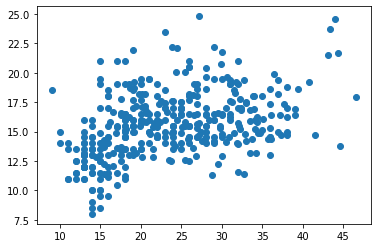

In [241]:
# OBSERVANDO POSSIVEL RELAÇÃO:
plt.scatter(auto_industry.mpg,auto_industry.acceleration)
plt.show()

# EX

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

In [ ]:
tt

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 